In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
df_comp = pd.DataFrame()
for root, _, files in os.walk(os.curdir):
    for file in files:
        if file.endswith('.csv') and file != 'compiled.csv' and root == '.':
            ID = file.split('.')[0]
            df = pd.read_csv(file).T.reset_index().T
            df = df.rename({'index':ID})
            df_comp = pd.concat([df_comp, df])
df_comp.drop(0,axis=1,inplace=True)
df_comp.columns = ['run 1', 'run 2', 'run 3', 'run 4']

In [3]:
df_comp = df_comp.astype(float)

In [4]:
df_comp['mean'] = df_comp.mean(axis=1)

In [5]:
df_comp = df_comp.iloc[:,-1:]
print(df_comp)

           mean
aj1     6.29450
aj2     4.63275
aj3     5.60550
aj4     4.23350
brent1  4.04500
brent2  7.59275
brent3  5.77150
brent4  8.94900
cido1   4.81350
cido2   3.05875
cido3   4.15375
cido4   3.79975
drei1   3.99775
drei2   2.91200
drei3   2.59825
drei4   3.91525
ethan1  4.16400
ethan2  5.20750
ethan3  3.73475
ethan4  2.95775
jo1     6.02800
jo2     6.38650
jo3     3.74550
jo4     5.68375
kyle1   5.07800
kyle2   3.81850
kyle3   5.18700
kyle4   4.06225
quinn1  6.90725
quinn2  4.10725
quinn3  4.24950
quinn4  4.36700


In [6]:
new_df = {}
for tester, data in df_comp.iterrows():
    if tester[:-1] not in new_df:
        new_df[tester[:-1]] = [0,0,0,0]
    new_df[tester[:-1]][int(tester[-1])-1] = data['mean']

In [7]:
new_df = pd.DataFrame(new_df).T

In [8]:
new_df.columns = ['trial 1', 'trial 2', 'trial 3', 'trial 4']

In [9]:
new_df.to_excel('control.xlsx')

In [10]:
def boxplot_per_run(df, y_low, y_upper, title):
    df[['trial 1', 'trial 2', 'trial 3', 'trial 4']].boxplot()
    plt.title(title)
    plt.ylim((y_low, y_upper))
    plt.xlabel('Trials')
    plt.ylabel('Time (s)')
    plt.show()

In [11]:
def lineplot_per_run(df, y_low, y_upper, title):
    df = df.reset_index().drop('index', axis=1)
    df = df.reset_index()
    df['index'] += 1
    new_index = ['tester ' + str(each) for each in list(df['index'])]
    df.index = new_index
    df.drop('index', axis=1, inplace=True)
    df.T.plot()
    plt.title(title)
    plt.ylim((y_low, y_upper))
    plt.xlabel('Trials')
    plt.ylabel('Time (s)')
    plt.grid(True)
    plt.xticks([0,1,2,3])
    plt.show()

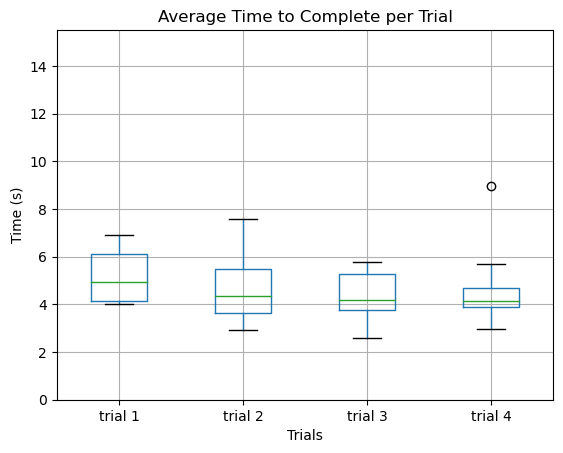

In [12]:
boxplot_per_run(new_df, 0, 15.5, 'Average Time to Complete per Trial')

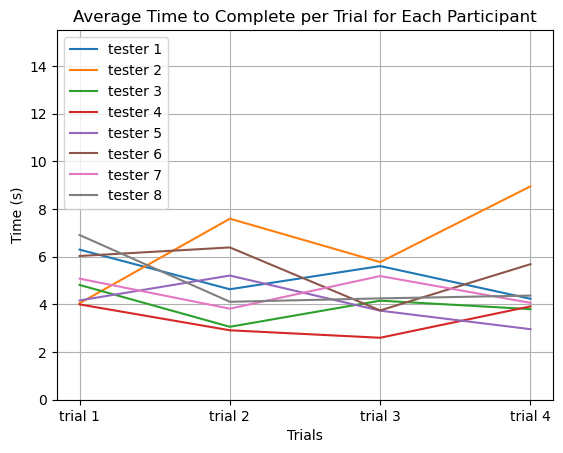

In [13]:
lineplot_per_run(new_df, 0, 15.5, 'Average Time to Complete per Trial for Each Participant')